# Recomendar música

Con este código se recomendarán canciones que tengas similitudes a una canción dada

El primer paso constiría en importar las librerías correspondientes. Por ello se importarán librerías numpy, pandas, sklearn y seaborn, que son necesarias para realizar operaciones matemáticas, procesar datos, calcular similitudes y visualizar resultados.

Para poder leer el archivo csv que contiene el dataset que contiene las letras de las canciones utilizaremos la función `pd.read_csv`, y lo almacenaremos en una variable llamada **df**.

En este ejemplo, usaremos la clase `CountVectorizer` de *sklearn* para transformar las letras de las canciones en vectores numéricos, que representan la frecuencia de cada palabra en cada canción. También usaremos la función `cosine_similarity` de *sklearn* para calcular la similitud del coseno entre los vectores de las canciones, que es una medida de cuánto se parecen las letras de dos canciones.

Con la librería *seaborn* crearemos un mapa de calor que muestra la matriz de similitud entre las canciones, usando la función `sns.heatmap`.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns



---


Antes de empezar, leeremos el archivo csv que contiene las letras de las canciones y lo almacena en una variable llamada `dt`. El archivo csv tiene dos columnas: `song` y `lyrics`, que indican el título de la canción y la letra correspondiente. Se usa la función `pd.read_csv` de la librería *pandas* para leer el archivo csv y devolver un objeto de tipo `DataFrame`, que es una estructura de datos tabular con filas y columnas. La variable `dt` contiene el `DataFrame` con las canciones y las letras. Se podría ver una muestra de los datos usando el método `dt.head()`, que te mostrará las primeras cinco filas del DataFrame.*texto en cursiva*

In [ ]:
dt = pd.read_csv('songs&lyrics.csv')



---


A continuación usaremos:

*   La librería *seaborn* para crear un histograma que muestra la distribución de la popularidad de las canciones, usando la función `sns.histplot`.
*   El argumento `x='Popularity'` para indicar que la variable que se quiere representar en el eje x es la columna `Popularity` del DataFrame `dt`, que contiene un valor numérico que mide el éxito de cada canción.
*   El argumento `kde=True` para añadir una curva de densidad estimada al histograma, que muestra la forma de la distribución de los datos.
Usa el argumento `color='g'` para cambiar el color del histograma y la curva a verde.

Con esta parte de código, se puede obtener una idea de cómo se distribuye la popularidad de las canciones, y se podría usar esta información para recomendar música a los usuarios según sus gustos. Por ejemplo, si a un usuario le gustan las canciones más populares, se podría buscar en el histograma qué canciones tienen una popularidad alta, y sugerirle que las escuche.

<Axes: xlabel='Popularity', ylabel='Count'>

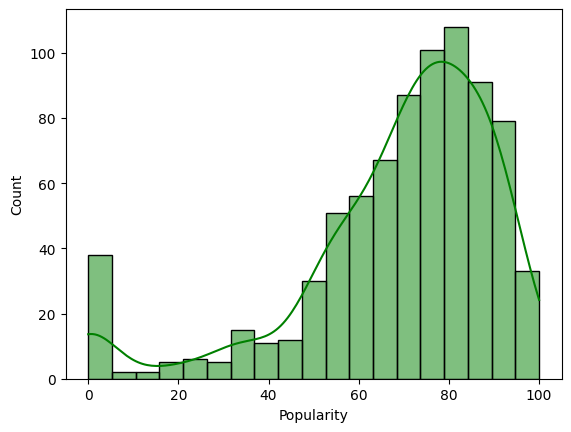

In [ ]:
sns.histplot(dt, x='Popularity', kde=True, color='g')



---


Creamos una nueva columna en el DataFrame `dt` llamada `Overview`, que contiene un resumen de cada canción, usando el operador `=` para asignar un valor a la columna.

Con el el operador `+` concatenaremos los valores de las columnas `Artist`, `Album`, `Popularity` y `Lyrics` de cada canción, separados por un punto `.`, y los almacena en la columna `Overview`.

El método `astype(str)` convertirá los valores de la columna `Popularity`, que son de tipo numérico, a tipo cadena de texto, para poder concatenarlos con las otras columnas.

Por último, el operador `[]` seleccionará las columnas del DataFrame `dt` por sus nombres, y los pasa como argumentos al operador `+`.

Con este código, se puede obtener una columna que resume la información de cada canción, y se podría usar esta información para recomendar música a los usuarios según sus intereses. Por ejemplo, si a un usuario le gusta un artista, un álbum, o una letra en particular, se podría buscar en la columna `Overview` qué canciones coinciden con sus preferencias, y sugerirle que las escuche.

In [ ]:
dt['Overview'] = dt['Artist'] + ". " + dt['Album'] + ". " + dt['Popularity'].astype(str) + ". " + dt['Lyrics']



---


Tras obtener la columna `Overview` la modificaremos, esta columna contiene el resumen de cada canción, y usando el operador `=` se modificará para asignar un nuevo valor a la columna. Se usará el método `apply` para aplicar una función a cada valor de la columna `Overview`, y devolver una nueva columna con los valores modificados.

Con una función anónima o lambda, que se define con la palabra clave `lambda`, se especifica la función que se quiere aplicar. La función toma un argumento `x`, que representa cada valor de la columna `Overview`, y devuelve el valor convertido a minúsculas, usando el método `lower`.

Con el uso del operador `[]` seleccionamos la columna `Overview` del DataFrame `dt` por su nombre, y la pasa como argumento al método `apply`.

Con este código, se puede obtener una columna que contiene el resumen de cada canción en minúsculas, y se podría usar esta información para recomendar música a los usuarios según sus intereses. Por ejemplo, si a un usuario le gusta un artista, un álbum, o una letra en particular, se podría buscar en la columna `Overview` qué canciones coinciden con sus preferencias, sin importar si están escritas en mayúsculas o minúsculas, y sugerirle que las escuche.

In [ ]:
dt['Overview'] = dt['Overview'].apply(lambda x: x.lower())



---


Creamos una nueva columna en el DataFrame `dt` llamada `Name`, que contiene el nombre de cada canción. El código hace lo siguiente:

* Usa el operador `=` para asignar un valor a la columna `Name` del DataFrame `dt`, que se crea si no existe previamente.
* Usa el método `apply` para aplicar una función a cada valor de la columna `Name`, y devolver una nueva columna con los valores modificados.
* Usa una función anónima o lambda, que se define con la palabra clave `lambda`, para especificar la función que se quiere aplicar. La función toma un argumento `x`, que representa cada valor de la columna `Name`, y devuelve el valor convertido a minúsculas, usando el método `lower`.
* Usa el operador `[]` para seleccionar la columna `Name` del DataFrame `dt` por su nombre, y la pasa como argumento al método `apply`.

Con este código, se puede obtener una columna que contiene el nombre de cada canción en minúsculas, y se podría usar esta información para recomendar música a los usuarios según sus intereses. Por ejemplo, si a un usuario le gusta una canción con un nombre específico, se podría buscar en la columna Name qué canciones coinciden con su preferencia, sin importar si están escritas en mayúsculas o minúsculas, y sugerirle que las escuche.

In [ ]:
dt['Name'] = dt['Name'].apply(lambda x: x.lower())



---


Las siguientes líneas de código hacen lo siguiente:

* Crea un objeto de la clase `CountVectorizer` de *sklearn*, que es una herramienta para transformar las letras de las canciones en vectores numéricos, usando el operador `=` para asignar el objeto a una variable llamada `cv`.
* Usa el argumento` max_features=5000` para indicar que solo se quieren considerar las 5000 palabras más frecuentes en el conjunto de datos, y descartar las demás.
* Usa el argumento `stop_words='english'` para indicar que se quieren eliminar las palabras vacías o irrelevantes del idioma inglés, como artículos, preposiciones o conjunciones, que no aportan información significativa a las letras.
* Usa el método `fit_transform` para ajustar el objeto `cv` al conjunto de datos, y transformar las letras de las canciones en vectores numéricos, que representan la frecuencia de cada palabra en cada canción.
* Usa el argumento `dt['Overview']` para pasar la columna `Overview` del DataFrame `dt` como el conjunto de datos que se quiere transformar, que contiene el resumen de cada canción.
* Usa el método `toarray` para convertir el resultado del método `fit_transform` en un array de *numpy*, que es una estructura de datos que almacena los vectores numéricos en forma de matriz.
* Usa el operador `=` para asignar el array de *numpy* a una variable llamada `vector`, que contiene la representación numérica de las letras de las canciones.

Con este código, se puede obtener una matriz que contiene los vectores numéricos de las letras de las canciones, y se podría usar esta información para calcular la similitud entre las canciones, y recomendar música a los usuarios según sus intereses. Por ejemplo, si a un usuario le gusta una canción con una letra específica, se podría buscar en la matriz `vector` qué canciones tienen una similitud alta con ella, y sugerirle que las escuche.

In [ ]:
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(dt['Overview']).toarray()



---


Esta parte de código sería la última parte del programa que tiene como objetivo recomendar música similar. El código hace lo siguiente:

* Calcula la similitud del coseno entre los vectores numéricos de las letras de las canciones, usando la función `cosine_similarity` de sklearn, y devuelve una matriz que contiene los valores de similitud entre cada par de canciones.
* Usa el argumento `vector` para pasar la matriz que contiene los vectores numéricos de las letras de las canciones, que se obtuvo en el código anterior, como el conjunto de datos que se quiere comparar.
* Usa el operador `=` para asignar la matriz de similitud a una variable llamada `similarity`, que contiene la medida de cuánto se parecen las letras de dos canciones.

Con este código, se puede obtener una matriz que contiene la similitud entre las canciones, y se podría usar esta información para recomendar música a los usuarios según sus intereses. Por ejemplo, si a un usuario le gusta una canción con una letra específica, se podría buscar en la matriz `similarity` qué canciones tienen una similitud alta con ella, y sugerirle que las escuche.

In [ ]:
similarity = cosine_similarity(vector)



---


Por último, definiremos la función que tiene como objetivo recomendar canciones similares. El código hace lo siguiente:

* Define una función llamada `similar_song`, que toma un argumento `name`, que representa el nombre de una canción.
* Convierte el argumento `name` a minúsculas, usando el método `lower`, para que coincida con el formato de la columna `Name` del DataFrame `dt`.
* Busca el índice de la fila que corresponde a la canción con el nombre dado, usando el operador `[]` para seleccionar la columna `Name` del DataFrame `dt`, y el método `index` para obtener el índice de la fila que cumple la condición `dt['Name'] == name`. Almacena el índice en una variable llamada `indices`.
* Busca el vector de similitud que corresponde a la canción con el nombre dado, usando el operador `[]` para seleccionar la fila `indices` de la matriz `similarity`, que contiene los valores de similitud entre cada par de canciones. Almacena el vector en una variable llamada `distances`.
* Ordena el vector de similitud de mayor a menor, usando la función `sorted`, y devuelve una lista de tuplas que contienen el índice y el valor de similitud de cada canción, excepto la primera, que corresponde a la canción con el nombre dado. Usa el argumento `reverse = True` para indicar que se quiere ordenar de forma descendente, y el argumento `key=lambda x: x[1]` para indicar que se quiere ordenar según el segundo elemento de cada tupla, que es el valor de similitud. Usa el operador `[]` para seleccionar las cinco primeras tuplas de la lista, que corresponden a las cinco canciones más similares. Almacena la lista en una variable llamada `arr`.
* Imprime un mensaje que dice “Las opciones recomendadas son:”, usando la función `print`, para indicar que se van a mostrar las canciones recomendadas.
* Recorre la lista `arr` con un bucle `for`, usando la variable `i` para representar cada tupla de la lista, y hace lo siguiente:
 * Busca el nombre de la canción que corresponde al índice de la tupla `i`, usando el método `loc` para seleccionar el valor de la columna `Name` y la fila `i[0]` del DataFrame `dt`. Almacena el nombre en una variable llamada `song_name`.
 * Busca el artista de la canción que corresponde al índice de la tupla `i`, usando el método `loc` para seleccionar el valor de la columna `Artist` y la fila `i[0]` del DataFrame `dt`. Almacena el artista en una variable llamada `artist`.
 * Busca el álbum de la canción que corresponde al índice de la tupla `i`, usando el método `loc` para seleccionar el valor de la columna `Album` y la fila `i[0]` del DataFrame `dt`. Almacena el álbum en una variable llamada `album`.
 * Imprime el nombre, el artista y el álbum de la canción recomendada, usando la función `print` y el método `format` para insertar los valores de las variables en una cadena de texto. Usa el método `capitalize` para convertir la primera letra del nombre de la canción a mayúscula.


In [ ]:
def similar_song(name):
    name = name.lower()
    indices = dt[dt['Name'] == name].index[0]
    distances = similarity[indices]
    arr = sorted(list(enumerate(distances)), reverse = True, key=lambda x: x[1])[1:6]
    print("Las opciones recomendadas son:")
    for i in arr:
        song_name = dt.loc[i[0], 'Name']
        artist = dt.loc[i[0], 'Artist']
        album = dt.loc[i[0],'Album']
        print("{} by {}, album - {}".format(song_name.capitalize(), artist, album))

Con este código, se puede obtener una lista de cinco canciones similares a la canción dada, y se podría usar esta información para recomendar música a los usuarios según sus intereses. Por ejemplo, si a un usuario le gusta la canción "Imagine" de John Lennon, se podría invocar la función `similar_song("Imagine - Remastered 2010")` y obtener el siguiente resultado:


In [ ]:
similar_song("Imagine - Remastered 2010")

Las opciones recomendadas son:
You send me - remastered by Sam Cooke, album - Sam Cooke (Remastered)
Princess diana (with nicki minaj) by Ice Spice, album - Princess Diana (with Nicki Minaj)
Superhero (heroes & villains) [with future & chris brown] by Metro Boomin, album - HEROES & VILLAINS
Enemy (with jid) - from the series arcane league of legends by Imagine Dragons, album - Enemy (with JID) [from the series Arcane League of Legends]
Bellissima - radio edit by DJ Quicksilver, album - Ten Top10 90s Hits
